In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import pickle

/Users/gimli/projects/igre


In [2]:
with open("data/processed/metacentrum/40-pickled.pkl", "rb") as src:
    data = pickle.load(src)

In [3]:
data

[[-30.1,
  -16.2,
  0.0,
  0.95,
  0.95,
  0,
  4,
  3,
  -30.152279883623123,
  -16.165761277079582,
  0.0022685579533911434,
  0.9999306487850845,
  1.0000410991458921],
 [-30.1,
  -16.2,
  -2.0,
  1.05,
  1.05,
  0,
  10,
  3,
  -30.093807727098465,
  -16.260933130979538,
  -2.000807440933209,
  1.0000395075418056,
  0.9999648117169272],
 [-30.1,
  -16.2,
  -2.0,
  1.05,
  1.05,
  2,
  15,
  3,
  -29.910601675510406,
  -16.177166253328323,
  -1.999475724799786,
  0.9998197950189933,
  0.9999616722372593],
 [-30.1,
  -16.2,
  5.0,
  1.1,
  1.1,
  4,
  27,
  3,
  -30.4173044860363,
  -16.508527100086212,
  4.995239041940233,
  0.9998438747250475,
  0.9999694872385589],
 [-30.1,
  -16.2,
  0.0,
  1.0,
  1.0,
  6,
  20,
  3,
  109.11156237125397,
  57.180650532245636,
  -10.005572801946194,
  0.6998720169067383,
  0.828688097000122],
 [-30.1,
  -16.2,
  -2.0,
  1.08,
  1.08,
  -2,
  20,
  3,
  -30.09188361465931,
  -16.237253323197365,
  -1.999214470064033,
  0.9998485983349383,
  1.000

In [4]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["x_shift", "y_shift", "rotation", "x_scale", "y_scale", 
              "distance", "sample", "repeat", 
              "x_est", "y_est", "rot_est", "x_sc_est", "y_sc_est"]

In [5]:
df

,x_shift,y_shift,rotation,x_scale,y_scale,distance,sample,repeat,x_est,y_est,rot_est,x_sc_est,y_sc_est
0,-30.1,-16.2,0.0,0.95,0.95,0,4,3,-30.152280,-16.165761,0.002269,0.999931,1.000041
1,-30.1,-16.2,-2.0,1.05,1.05,0,10,3,-30.093808,-16.260933,-2.000807,1.000040,0.999965
2,-30.1,-16.2,-2.0,1.05,1.05,2,15,3,-29.910602,-16.177166,-1.999476,0.999820,0.999962
3,-30.1,-16.2,5.0,1.10,1.10,4,27,3,-30.417304,-16.508527,4.995239,0.999844,0.999969
4,-30.1,-16.2,0.0,1.00,1.00,6,20,3,109.111562,57.180651,-10.005573,0.699872,0.828688
5,-30.1,-16.2,-2.0,1.08,1.08,-2,20,3,-30.091884,-16.237253,-1.999214,0.999849,1.000084
6,-30.1,-16.2,3.0,1.02,1.02,2,6,3,-30.139072,-16.150367,3.001673,1.000310,0.999744
7,-30.1,-16.2,-4.0,1.05,1.05,6,36,3,-30.101568,-16.183104,-4.001690,1.000177,1.000075
8,-30.1,-16.2,-4.0,0.95,0.95,4,9,3,-25.244169,-21.795223,-6.312528,0.883644,1.054304
9,-30.1,-16.2,5.0,1.02,1.02,2,26,3,-30.473921,-16.373780,4.993002,1.000025,1.000043


In [6]:
sample_filtr = df["sample"] == 1
df[sample_filtr]

,x_shift,y_shift,rotation,x_scale,y_scale,distance,sample,repeat,x_est,y_est,rot_est,x_sc_est,y_sc_est
55,-30.1,-16.2,-2.0,1.05,1.05,4,1,3,29.912390,2.775870,-1.668750,0.819345,0.934894
72,-30.1,-16.2,-2.0,1.08,1.08,-4,1,3,-73.652454,-58.446448,12.743389,1.160149,1.039113
99,-30.1,-16.2,3.0,1.05,1.05,-2,1,3,-30.053306,-16.231442,2.998065,1.000051,1.000102
114,-30.1,-16.2,5.0,1.08,1.08,2,1,3,16.647588,-9.591864,3.446963,0.846960,1.004197
232,-30.1,-16.2,0.0,0.95,0.95,-2,1,3,-30.094143,-16.151430,-0.000529,1.000049,1.000025
357,-30.1,-16.2,1.0,1.05,1.05,6,1,3,11.252494,-15.045200,0.766154,0.871808,1.000112
388,-30.1,-16.2,3.0,1.10,1.10,6,1,3,14.037399,-13.619441,2.449926,0.863810,1.001330
448,-30.1,-16.2,-4.0,1.08,1.08,6,1,3,9.354947,-12.408021,-3.611925,0.877427,0.979324
462,-30.1,-16.2,-2.0,0.99,0.99,-2,1,3,-30.167967,-16.207932,-1.999606,1.000022,0.999990
501,-30.1,-16.2,5.0,1.02,1.02,0,1,3,-30.131228,-16.144615,4.999036,1.000004,0.999987


In [7]:
import numpy as np

In [8]:
np.tan(5/180*np.pi)*400

34.9954654103696

In [9]:
df["shift_err"] = np.sqrt(
    np.power(df["x_shift"]-df["x_est"], 2) 
    + np.power(df["y_shift"]-df["y_est"], 2) 
)

In [10]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


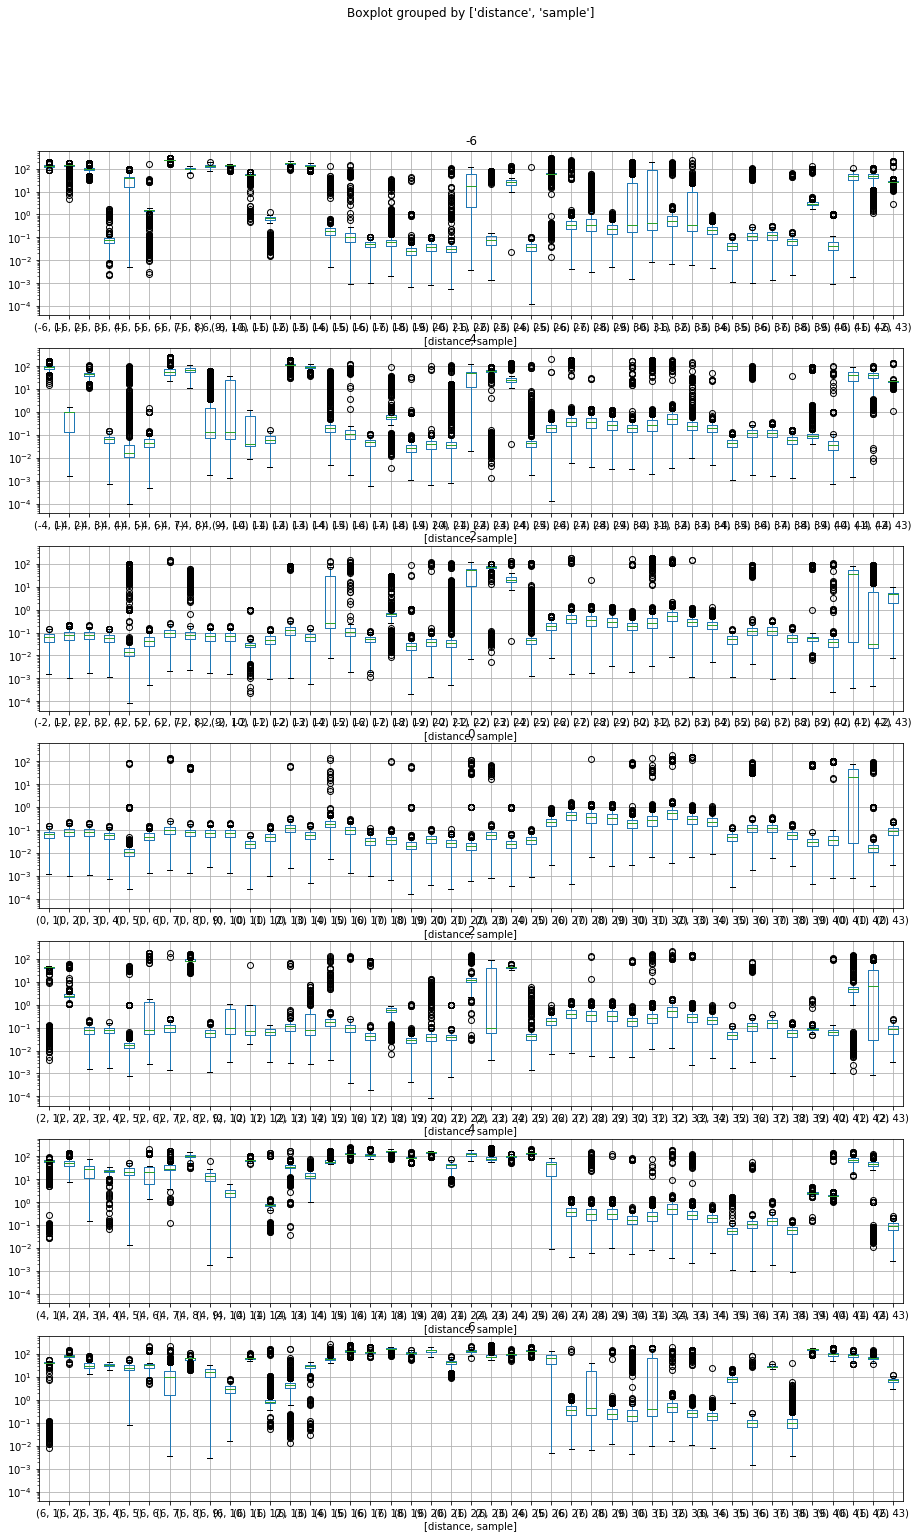

In [11]:
fig = plt.figure(figsize=(15,25))
ax = plt.subplot(1,1,1)
df.groupby("distance").boxplot(column="shift_err", by=["distance", "sample"], layout=(7,1), ax=ax)
plt.yscale("log")

In [12]:
df["rot_err"] = 34 * np.sqrt(
    np.power(df["rotation"]-df["rot_est"], 2)
)
df["scale_err"] = 400 * np.sqrt(
    np.power(df["x_scale"]-df["x_sc_est"], 2) + np.power(df["y_scale"]-df["y_sc_est"], 2)
)

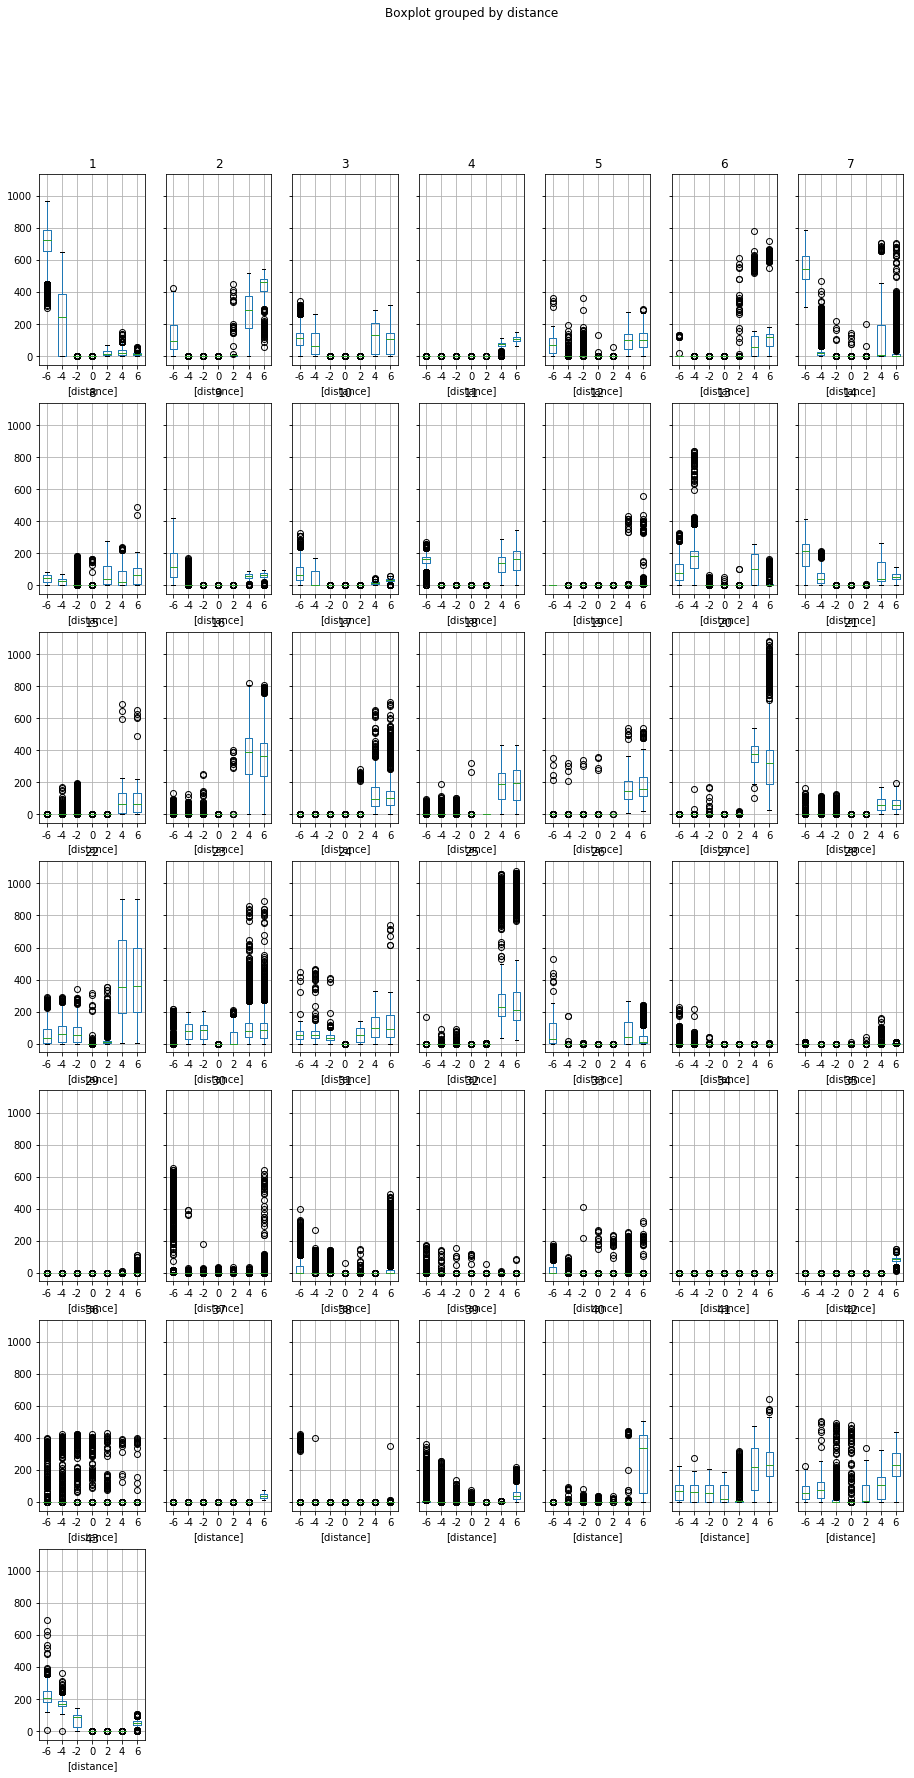

In [13]:
fig = plt.figure(figsize=(15,29))
ax = plt.subplot(1,1,1)
df.groupby("sample").boxplot(column="rot_err", by=["distance"], layout=(7,7), ax=ax)
plt.yscale("log")

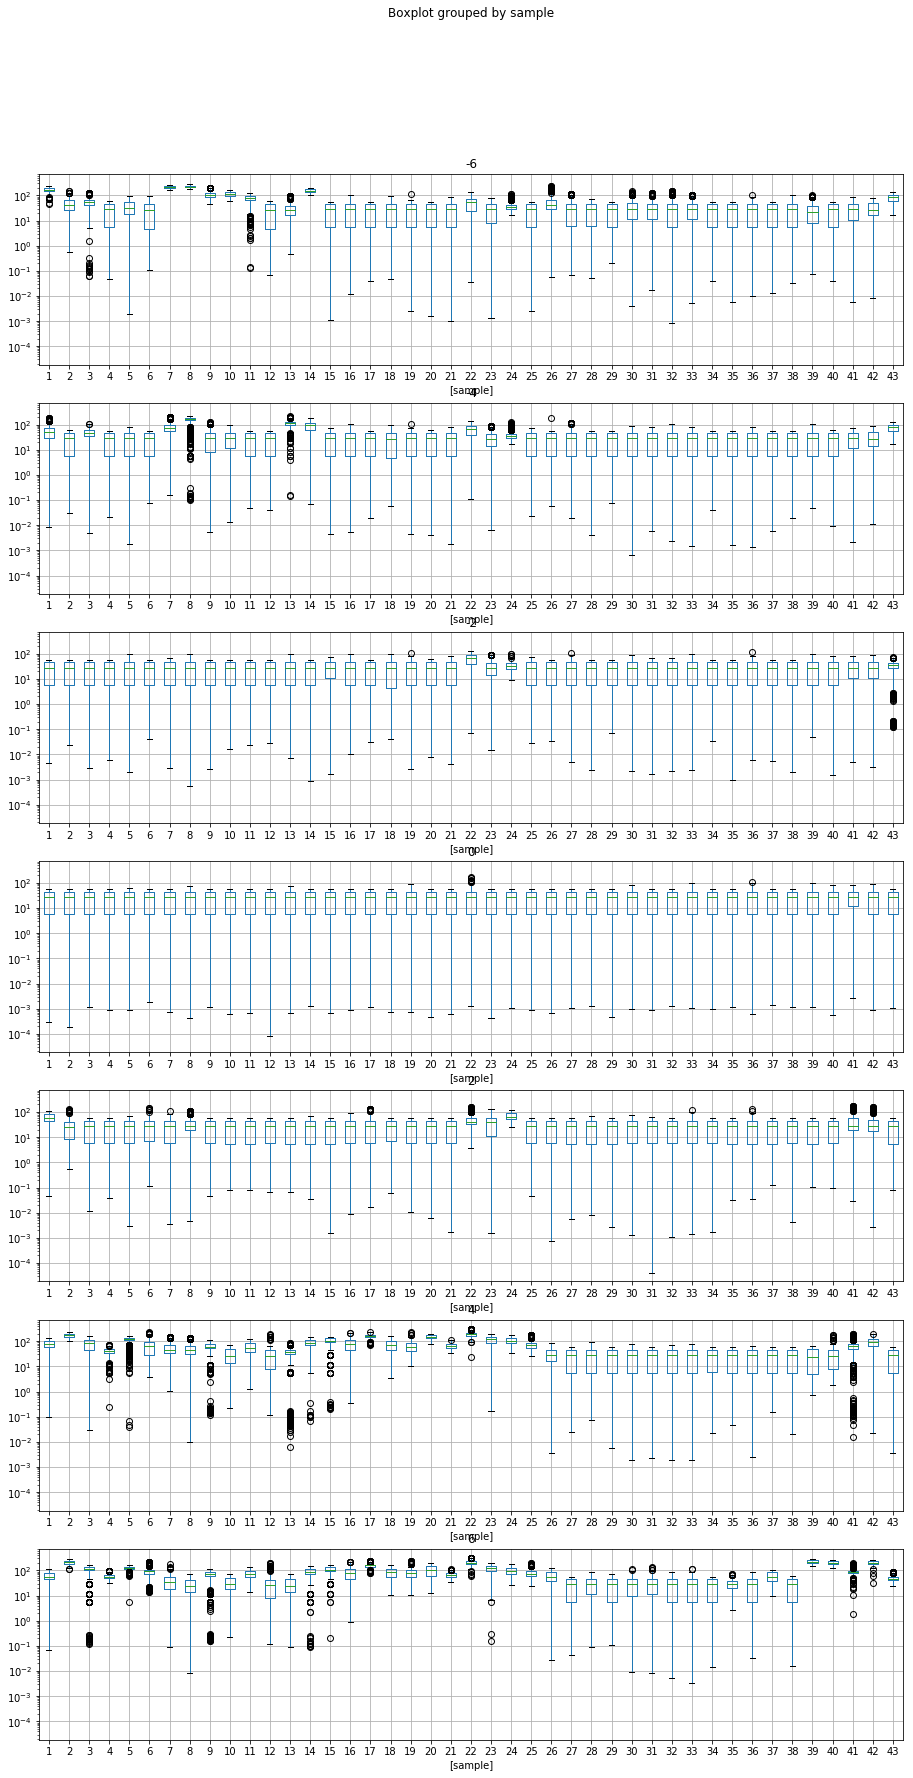

In [14]:
fig = plt.figure(figsize=(15,29))
ax = plt.subplot(1,1,1)
df.groupby("distance").boxplot(column="scale_err", by=["sample"], layout=(7,1), ax=ax)
plt.yscale("log")

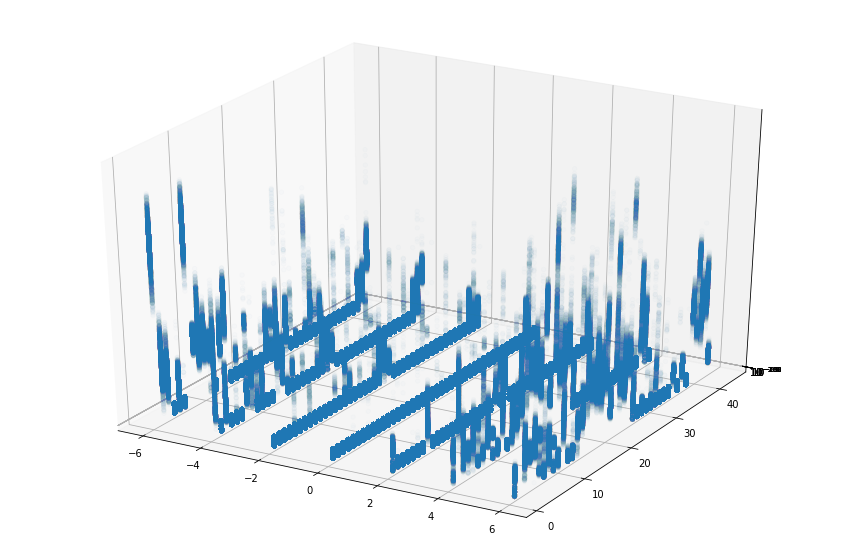

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["distance"], df["sample"], df["shift_err"] + df["rot_err"] + df["scale_err"], alpha=0.01)
ax.set_zscale("log")

In [17]:
df["err"] = df["shift_err"] + df["rot_err"] + df["scale_err"]

In [18]:
err_per_sample_distance = df.groupby(["sample", "distance"])["err"].agg(["mean"])
print(err_per_sample_distance.sort_values(by="mean").tail(20))

                        mean
sample distance             
13     -4         400.272911
41      6         413.282789
18      4         419.618418
39      6         434.283760
18      6         441.777599
14     -6         479.400272
2       4         499.832676
42      6         502.017200
25      4         537.739574
40      6         564.120049
16      6         567.797790
25      6         569.321548
20      6         580.319364
16      4         582.424437
20      4         675.293121
22      4         728.135982
2       6         731.385408
22      6         735.556647
7      -6        1002.378229
1      -6        1007.988231


In [40]:
correct = df[df["err"]<0.1][df["rot_err"]<0.1][df["scale_err"]<0.1].groupby(["sample", "distance"])["err"].agg(["count"]).unstack(fill_value=0).stack()
processed = df.groupby([ "sample", "distance"])["err"].agg(["count"])
to_show = correct.div(processed)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


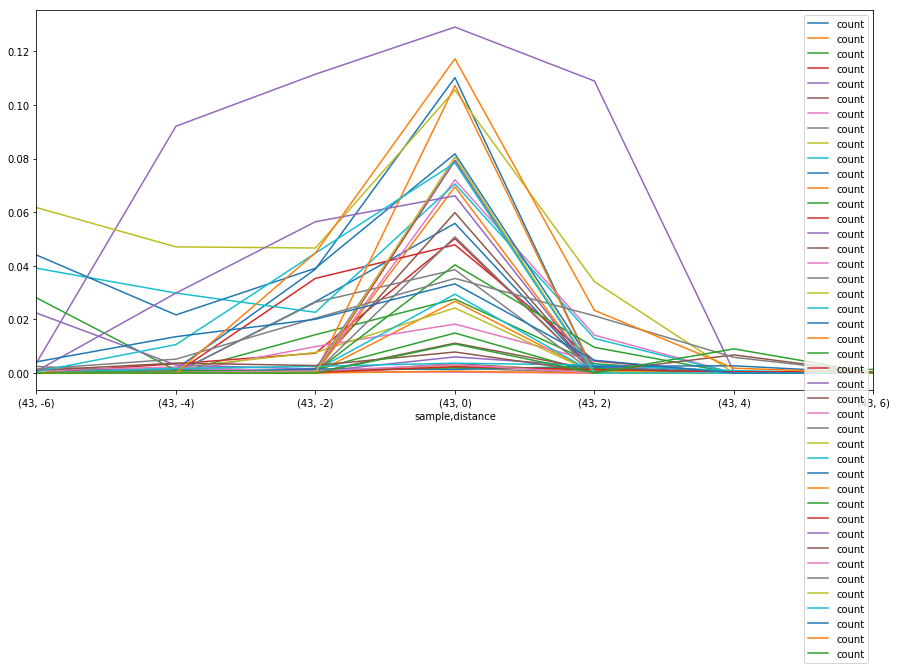

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
correct.div(processed).groupby(["sample"]).plot(by="sample", ax=ax)
plt.show()

In [22]:
correct.unstack().div(processed.unstack()).sort_index(level=3)

count                                                            
distance        -6        -4        -2         0         2         4         6
sample                                                                        
1         0.000000  0.000000  0.026627  0.055825  0.000000  0.000000  0.000000
2         0.000000  0.000000  0.000000  0.026750  0.000000  0.000000  0.000000
3         0.000000  0.000000  0.014300  0.027582  0.003482  0.000000  0.000000
4         0.000000  0.003446  0.007398  0.050149  0.000000  0.000000  0.000000
5         0.003772  0.092073  0.111467  0.129041  0.108926  0.000443  0.000000
6         0.000000  0.000000  0.001726  0.059848  0.000000  0.000000  0.000000
7         0.000000  0.000000  0.009864  0.018256  0.004395  0.000000  0.000000
8         0.000000  0.000000  0.026394  0.038525  0.000000  0.000000  0.000000
9         0.000000  0.001970  0.007649  0.024275  0.000000  0.000000  0.000000
10        0.000000  0.001724  0.000987  0.029412  0.000000  0.000000  0.000000
11        0.000000  0.001478  0.038737  0.110208  0.000000  0.000000  0.000000
12        0.000000  0.000000  0.000000  0.069441  0.000000  0.000000  0.000000
13        0.000000  0.000000  0.001234  0.014917  0.000000  0.000000  0.000000
14        0.000000  0.000000  0.035309  0.047818  0.004544  0.000000  0.000000
15        0.001229  0.001232  0.000494  0.006010  0.002481  0.000000  0.000000
16        0.000000  0.000739  0.000247  0.011141  0.001246  0.000000  0.000000
17        0.000983  0.002217  0.000247  0.072097  0.014120  0.000000  0.000000
18        0.002458  0.000000  0.000248  0.050801  0.000000  0.000000  0.000000
19        0.061716  0.047056  0.046639  0.105551  0.034067  0.000000  0.000000
20        0.039095  0.029818  0.022648  0.070538  0.012884  0.000000  0.000000
21        0.044024  0.021686  0.039084  0.081757  0.002080  0.000000  0.000000
22        0.000246  0.000000  0.000000  0.107266  0.000000  0.000000  0.000000
23        0.028037  0.000986  0.000498  0.040353  0.009575  0.000000  0.000000
24        0.000000  0.000000  0.000000  0.079280  0.000000  0.000000  0.000000
25        0.022381  0.002957  0.001498  0.079330  0.000418  0.000000  0.000000
26        0.000000  0.000000  0.000000  0.003481  0.000418  0.000000  0.000000
27        0.000000  0.000000  0.000501  0.000317  0.000000  0.000000  0.000000
28        0.000000  0.000493  0.000502  0.001911  0.000000  0.000000  0.000000
29        0.000000  0.000000  0.000000  0.002988  0.000838  0.000000  0.000000
30        0.000000  0.001725  0.002514  0.003665  0.002939  0.000900  0.000000
31        0.000000  0.000000  0.001514  0.001336  0.002521  0.002699  0.000000
32        0.000246  0.000000  0.000000  0.000670  0.000000  0.000000  0.000000
33        0.000000  0.000739  0.000759  0.002017  0.001685  0.000000  0.001384
34        0.000000  0.000000  0.000253  0.002366  0.001266  0.000450  0.000461
35        0.000738  0.029825  0.056431  0.066102  0.000000  0.000000  0.000000
36        0.000984  0.003698  0.002799  0.007836  0.000424  0.006751  0.000000
37        0.000000  0.000247  0.000765  0.003158  0.000000  0.000000  0.000000
38        0.001476  0.005178  0.020450  0.035286  0.021340  0.005858  0.000000
39        0.000000  0.000000  0.000257  0.080599  0.000000  0.000000  0.000000
40        0.000492  0.010602  0.044730  0.078396  0.000000  0.000000  0.000000
41        0.004184  0.013560  0.020062  0.033248  0.004750  0.000000  0.000000
42        0.000000  0.000000  0.044822  0.117234  0.023367  0.001803  0.000000
43        0.000000  0.000000  0.000000  0.010825  0.000000  0.009013  0.000000

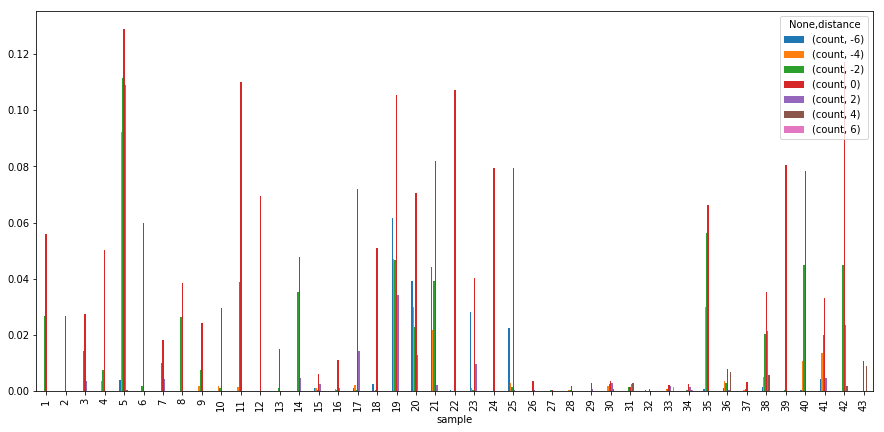

In [61]:
fig, ax = plt.subplots(figsize=(15,7))
to_show.unstack().plot.bar(ax=ax)
plt.show()

In [ ]:
from scipy.io import loadmat
for s in range(1,43):
    x = loadmat('data/raw/sample.mat')

In [63]:
ls "data/raw"

sample_1.mat        sample_20.mat       sample_31.mat       sample_42.mat
sample_10.mat       sample_21.mat       sample_32.mat       sample_43.mat
sample_11.mat       sample_22.mat       sample_33.mat       sample_44.mat
sample_12.mat       sample_23.mat       sample_34.mat       sample_5.mat
sample_13.mat       sample_24.mat       sample_35.mat       sample_6.mat
sample_14.mat       sample_25.mat       sample_36.mat       sample_7.mat
sample_15.mat       sample_26.mat       sample_37.mat       sample_8.mat
sample_16.mat       sample_27.mat       sample_38.mat       sample_9.mat
sample_17.mat       sample_28.mat       sample_39.mat       vlasic-dataset.mat
sample_18.mat       sample_29.mat       sample_4.mat
sample_19.mat       sample_3.mat        sample_40.mat
sample_2.mat        sample_30.mat       sample_41.mat


In [71]:
# clustering podle realného displacementu
df["lt_displacement"] = df["shift_err"]
x_real = df["x_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 - np.sin(df["rotation"]/180*np.pi) * 400 + df["x_shift"]
#x_est	y_est	rot_est	x_sc_est	y_sc_est
#x_est = df["x_sc_est"] * np.cos["rot_est"] * 400 - np.sin["rot_est"] * 400 + df["x_est"]
y_real = df["y_scale"] * np.cos(df["rotation"]/180*np.pi) * 400 + np.sin(df["rotation"]/180*np.pi) * 400 + df["y_shift"]
#y_est = df["y_sc_est"] * np.cos["rot_est"] * 400 + np.sin["rot_est"] * 400 + df["y_est"]
df["rb_displacement"] = np.sqrt(np.power(400-x_real, 2) + np.power(400-y_real, 2))

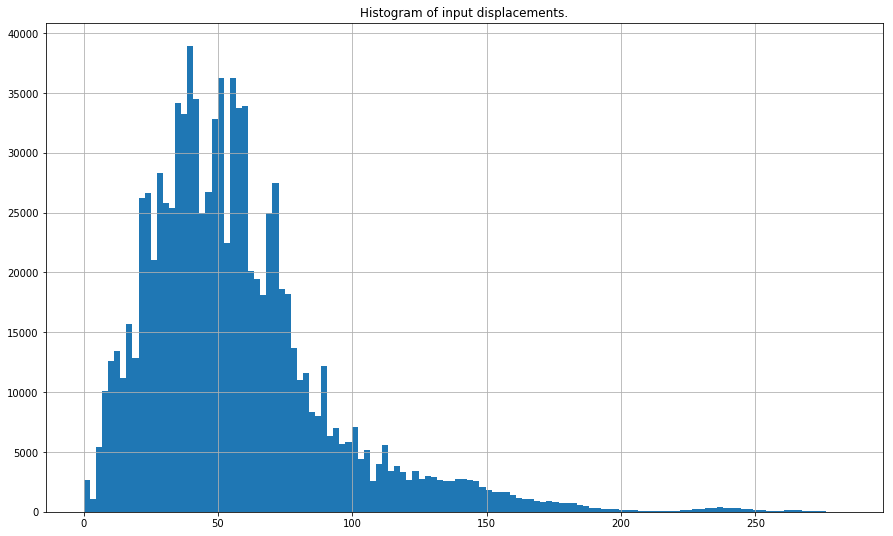

In [80]:
fig, ax = plt.subplots(figsize=(15,9))
df[["rb_displacement", "lt_displacement"]].max(axis=1).hist(ax=ax, bins=125)
plt.title("Histogram of input displacements.")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


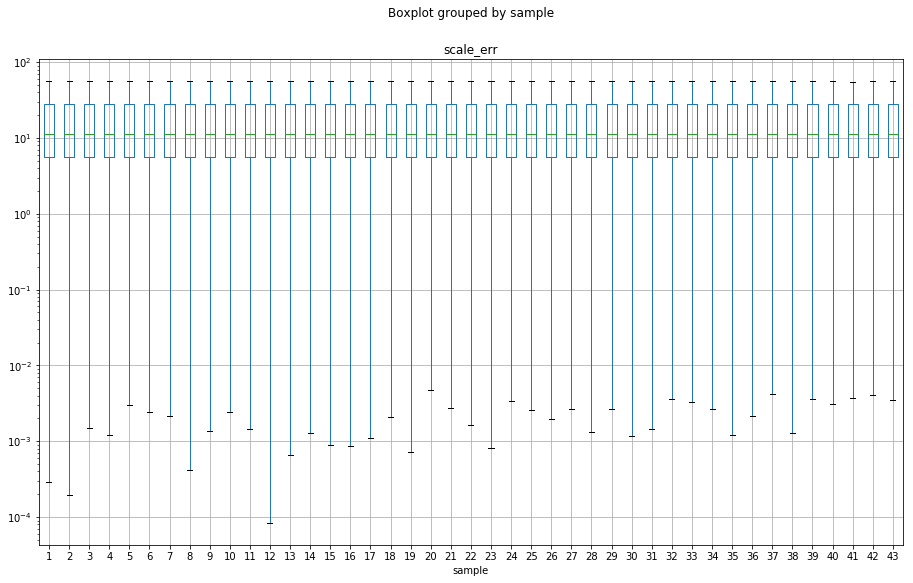

In [160]:
fig, ax = plt.subplots(figsize=(15,9))
df[df[["rb_displacement", "lt_displacement"]].max(axis=1) < 20][df["distance"]==0].boxplot(by="sample", column="scale_err", ax=ax)
plt.yscale("log")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


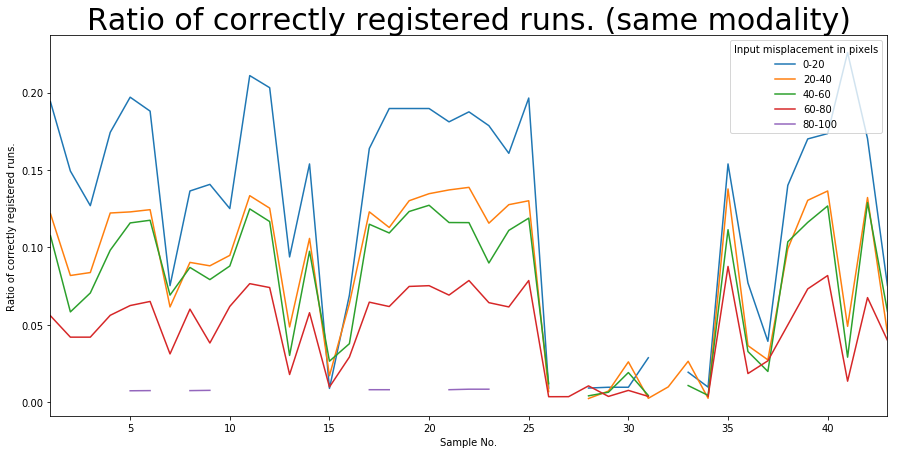

In [148]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1) & (df["scale_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,7))
for rg in range(0, 100, 20):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 10]\
            [df["distance"]==0]
    dtt[dtt["OK"]].groupby("sample")["OK"].agg("count").div(dtt.groupby("sample")["OK"].agg("count")).plot.line(label=f"{rg}-{rg+20}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Ratio of correctly registered runs. (same modality)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Ratio of correctly registered runs.")
plt.show()
    


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


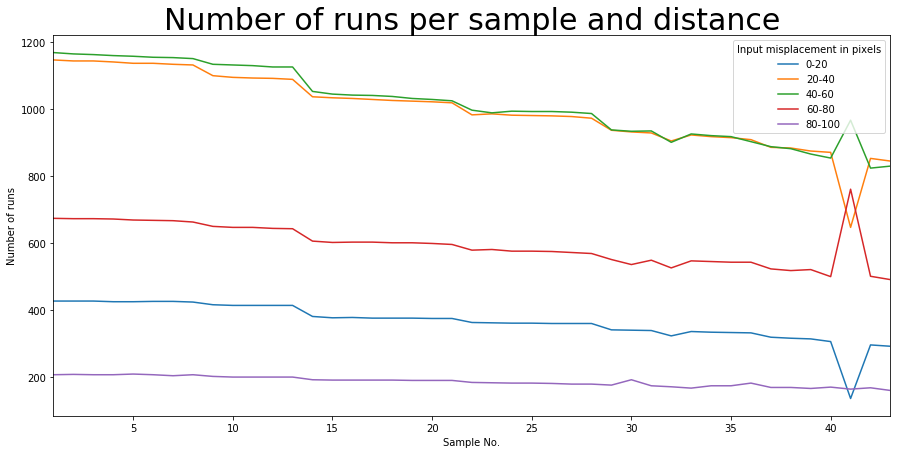

In [159]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1) & (df["scale_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,7))
step = 20
for rg in range(0, 100, step):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + step]\
            [df["distance"]==0]
    dtt.groupby("sample")["OK"].agg("count").plot.line(label=f"{rg}-{rg+step}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Number of runs per sample and distance", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Number of runs")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


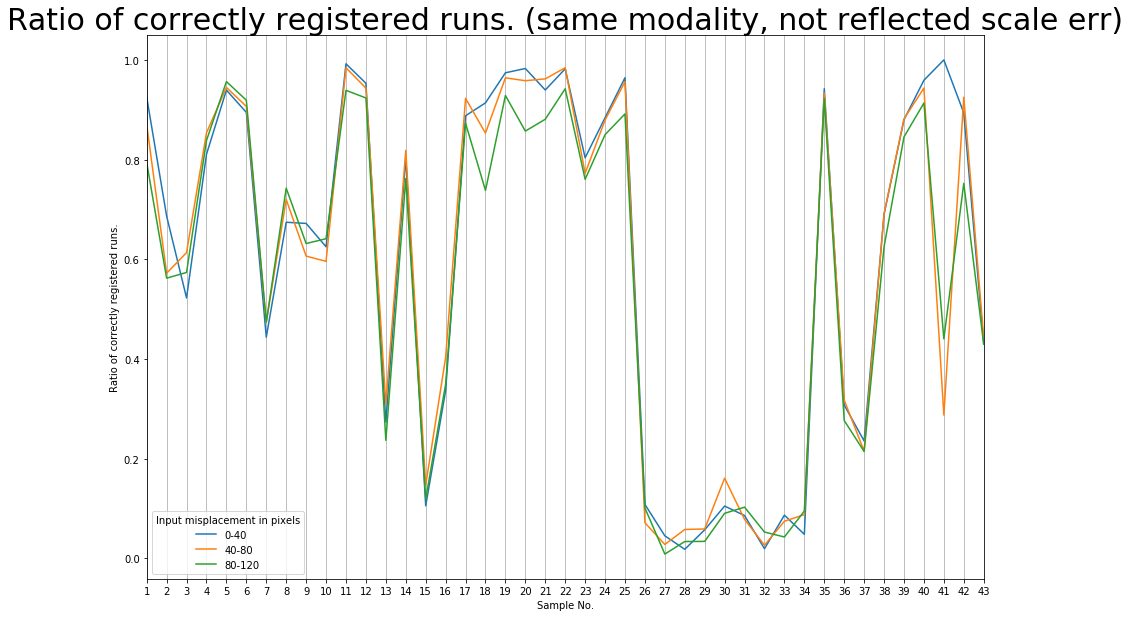

In [156]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,10))
for rg in range(0, 120, 40):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 10]\
            [df["distance"]==0]
    dtt[dtt["OK"]].groupby("sample")["OK"].agg("count").div(dtt.groupby("sample")["OK"].agg("count")).plot.line(label=f"{rg}-{rg+40}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Ratio of correctly registered runs. (same modality, not reflected scale err)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Ratio of correctly registered runs.")
plt.xticks(range(1,44))
ax.xaxis.grid(which="both")
plt.show()
    



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


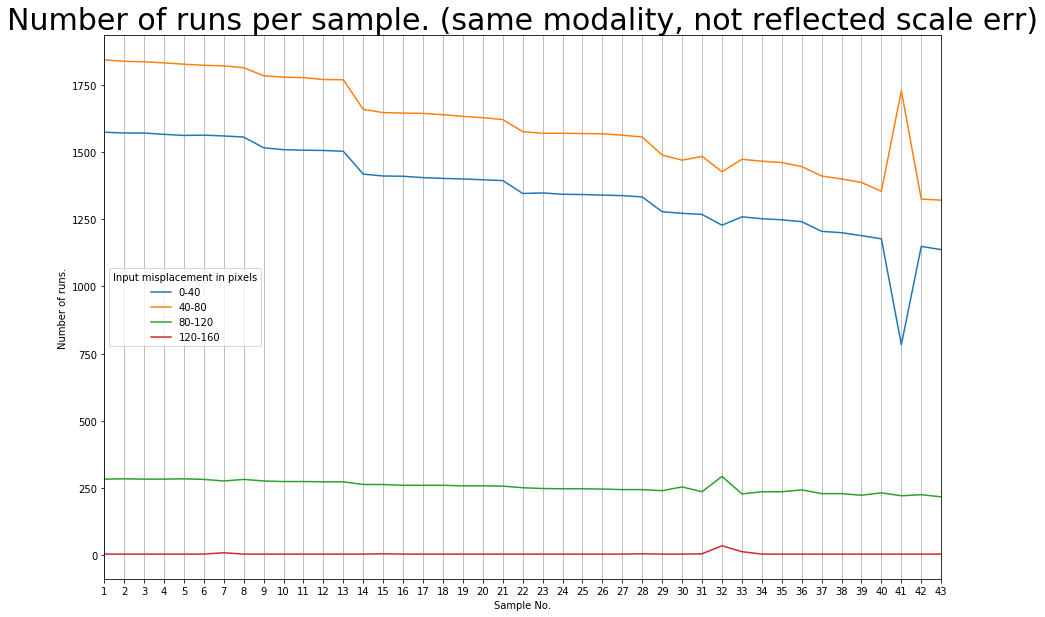

In [158]:
df["OK"] = (df["shift_err"] < 0.1) & (df["rot_err"] < 0.1)
fig, ax = plt.subplots(figsize=(15,10))
for rg in range(0, 160, 40):
    dtt = df[df[["rb_displacement", "lt_displacement"]].max(axis=1) > rg]\
            [df[["rb_displacement", "lt_displacement"]].max(axis=1) < rg + 40]\
            [df["distance"]==0]
    dtt.groupby("sample")["OK"].agg("count").plot.line(label=f"{rg}-{rg+40}", ax=ax)
plt.legend(title="Input misplacement in pixels")
plt.title("Number of runs per sample. (same modality, not reflected scale err)", fontsize=30)
plt.xlabel("Sample No.")
plt.ylabel("Number of runs.")
plt.xticks(range(1,44))
ax.xaxis.grid(which="both")
plt.show()